In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Filter the dataset to find entries where e_logMBH > 15
high_error_data = data[data['e_logMBH'] > 30]

# Count the number of such entries
high_error_count = len(high_error_data)

print(f"Number of data points with e_logMBH > 15: {high_error_count}")


Number of data points with e_logMBH > 15: 24


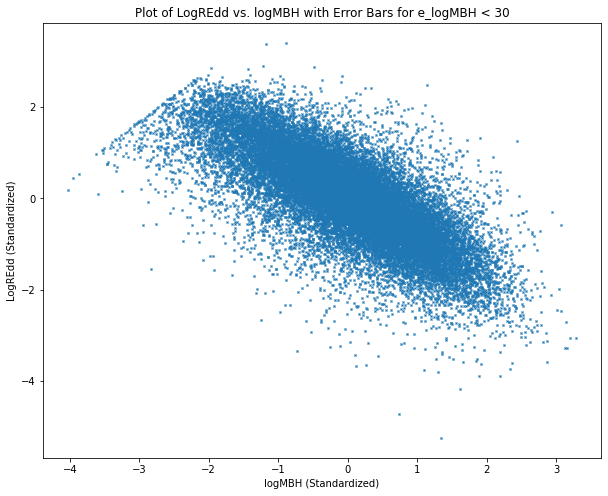

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Filter the dataset to include only rows where e_logMBH < 30 (approx 2 standard deviation)
filtered_data = data[data['e_logMBH'] < 30]

# Ensure the necessary columns exist in the DataFrame
if 'logMBH' in filtered_data.columns and 'LogREdd' in filtered_data.columns and 'e_logMBH' in filtered_data.columns:
    # Creating the plot
    plt.figure(figsize=(10, 8))
    plt.errorbar(filtered_data['logMBH'], filtered_data['LogREdd'], fmt='x', ecolor='red', capsize=5, markersize=2)
    plt.xlabel('logMBH (Standardized)')
    plt.ylabel('LogREdd (Standardized)')
    plt.title('Plot of LogREdd vs. logMBH with Error Bars for e_logMBH < 30')
    plt.grid(False)
    plt.show()
else:
    print("One or more columns are missing in your DataFrame.")

filtered_data.to_csv('filtered_data.csv')

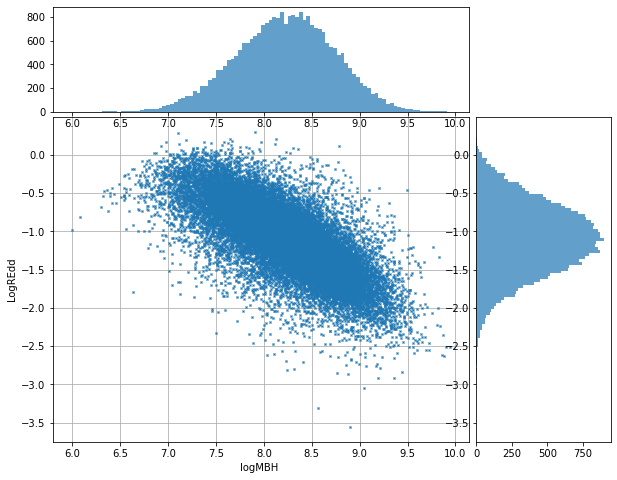

In [5]:
#Plot without standardisation

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Load the dataset
d1 = pd.read_csv('all_redshifted_data.csv')

# Filter the dataset to include only rows where e_logMBH < 30 (approx 2 standard deviation)
filtered_data = d1[d1['e_logMBH'] < 0.5]

# Ensure the necessary columns exist in the DataFrame
if 'logMBH' in filtered_data.columns and 'LogREdd' in filtered_data.columns and 'e_logMBH' in filtered_data.columns:
    # Set up the plot with gridspec
    fig = plt.figure(figsize=(10, 8))
    gs = GridSpec(4, 4)
    ax_main = fig.add_subplot(gs[1:4, 0:3])
    ax_x_hist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
    ax_y_hist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

    # Main scatter plot
    ax_main.errorbar(filtered_data['logMBH'], filtered_data['LogREdd'],
                     fmt='x', ecolor='red', capsize=2, markersize=2)
    ax_main.set(xlabel='logMBH ', ylabel='LogREdd')
    ax_main.grid(True)

    # Histogram on the x axis
    ax_x_hist.hist(filtered_data['logMBH'], bins=100, alpha=0.7)
    ax_x_hist.axis('on')  

    # Histogram on the y axis
    ax_y_hist.hist(filtered_data['LogREdd'], bins=100, orientation='horizontal', alpha=0.7)
    ax_y_hist.axis('on') 

    # Adjust layout
    plt.subplots_adjust(hspace=0.05, wspace=0.05)

    # Show plot
    plt.savefig('non-normalised logREdd vs logMBH.png',dpi=300)
    plt.show()
else:
    print("One or more columns are missing in your DataFrame.")


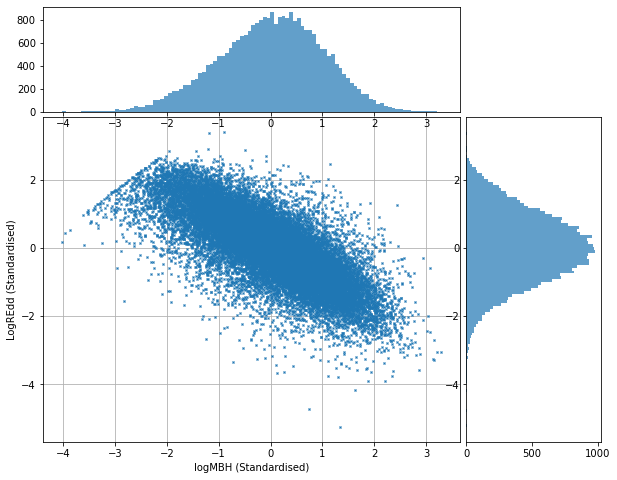

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Filter the dataset to include only rows where e_logMBH < 30 (approx 2 standard deviation)
filtered_data = data[data['e_logMBH'] < 30]

# Ensure the necessary columns exist in the DataFrame
if 'logMBH' in filtered_data.columns and 'LogREdd' in filtered_data.columns and 'e_logMBH' in filtered_data.columns:
    # Set up the plot with gridspec
    fig = plt.figure(figsize=(10, 8))
    gs = GridSpec(4, 4)
    ax_main = fig.add_subplot(gs[1:4, 0:3])
    ax_x_hist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
    ax_y_hist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

    # Main scatter plot
    ax_main.errorbar(filtered_data['logMBH'], filtered_data['LogREdd'], 
                     fmt='x', ecolor='red', capsize=2, markersize=2)
    ax_main.set(xlabel='logMBH (Standardised)', ylabel='LogREdd (Standardised)')
    ax_main.grid(True)

    # Histogram on the x axis
    ax_x_hist.hist(filtered_data['logMBH'], bins=100, alpha=0.7)
    ax_x_hist.axis('on')  

    # Histogram on the y axis
    ax_y_hist.hist(filtered_data['LogREdd'], bins=100, orientation='horizontal', alpha=0.7)
    ax_y_hist.axis('on') 

    # Adjust layout
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    
    plt.savefig('normalised LogRedd vs logMBH.png',dpi=300)
    # Show plot
    plt.show()
else:
    print("One or more columns are missing in your DataFrame.")


In [11]:
data = pd.read_csv('all_redshifted_data.csv')
data.head()
data['e_logMBH'].std()

14.400725915662369

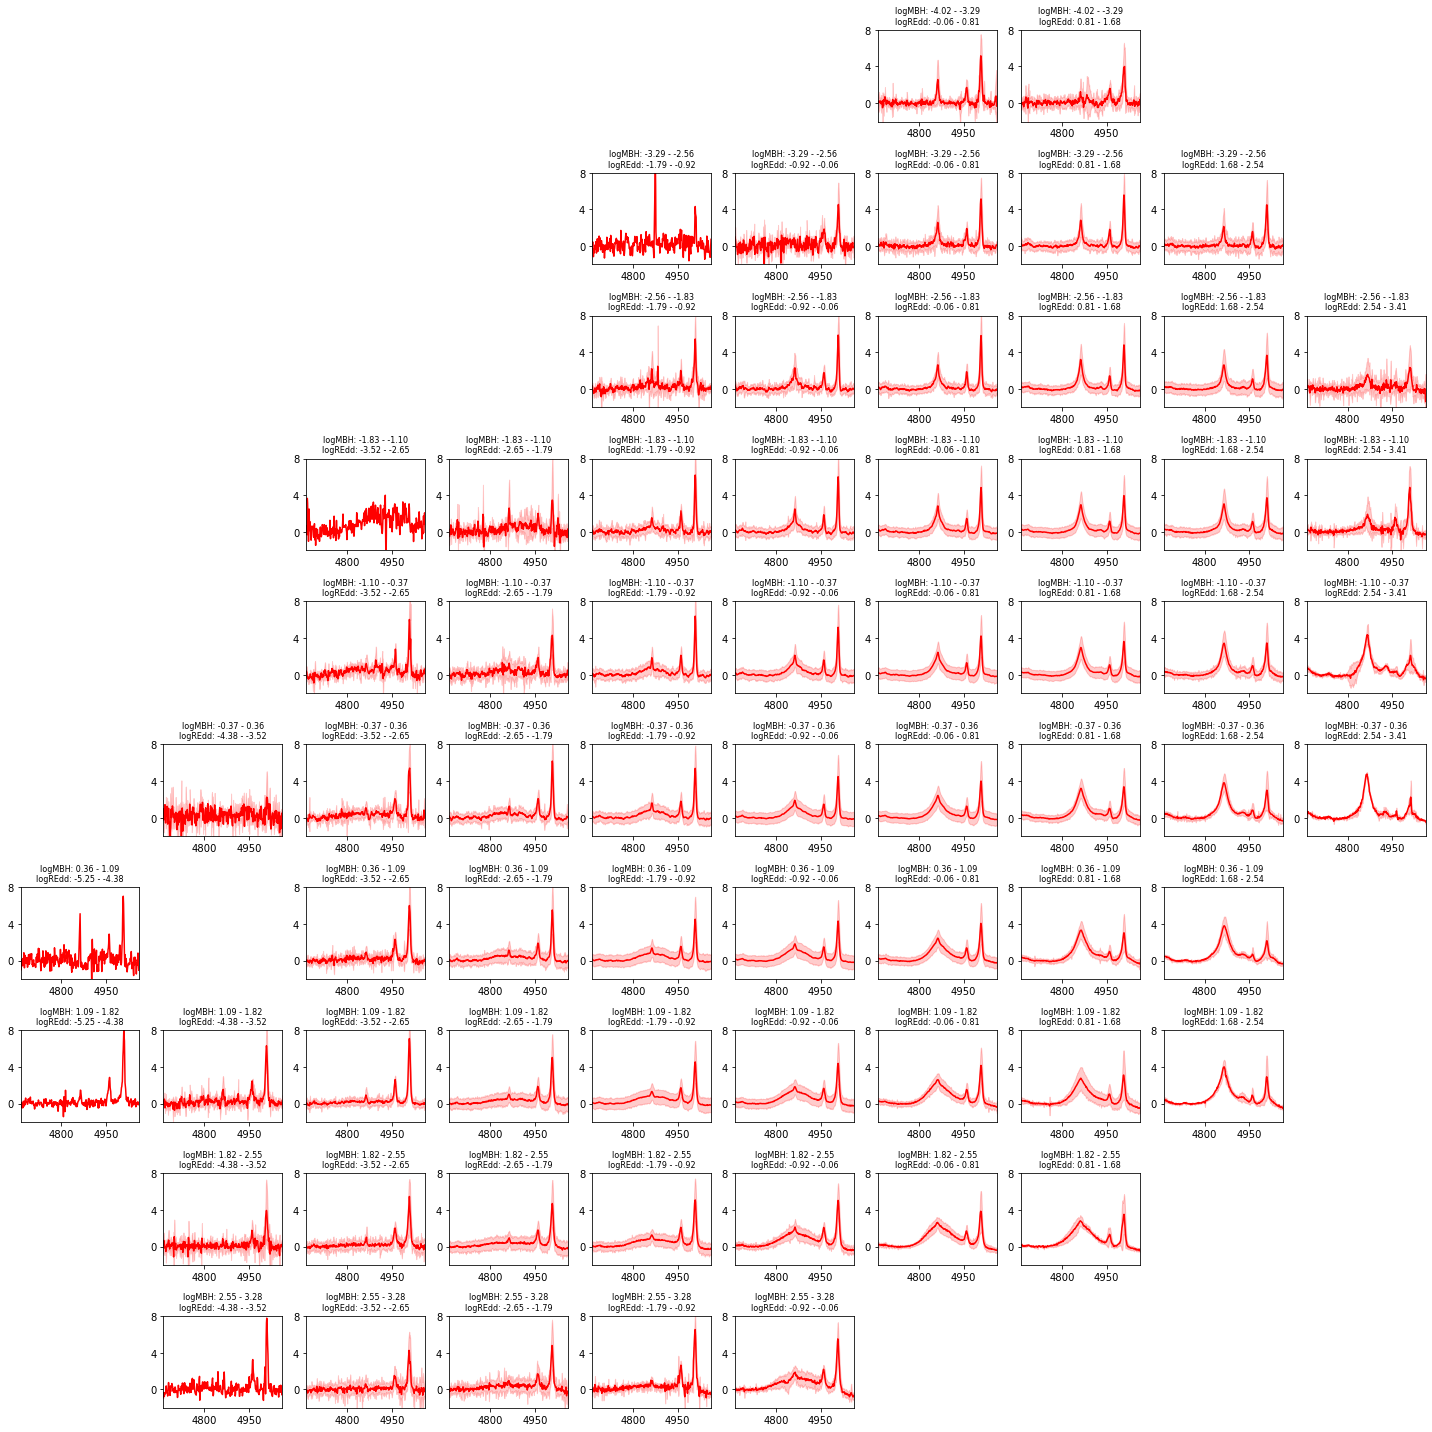

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Filter the dataset to include only rows where e_logMBH < 30
filtered_data = data[data['e_logMBH'] < 30]

# Assuming wavelength data columns are named like 'Flux_XXXX.X'
flux_columns = [col for col in filtered_data.columns if col.startswith('Flux_')]

# Define bin edges based on the range of logMBH and LogREdd
logMBH_bins = np.linspace(filtered_data['logMBH'].min(), filtered_data['logMBH'].max(), num=11)
LogREdd_bins = np.linspace(filtered_data['LogREdd'].min(), filtered_data['LogREdd'].max(), num=11)

# Create a 10x10 grid for subplots
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(10, 10, figure=fig)

# Bin the data
filtered_data['logMBH_bin'] = pd.cut(filtered_data['logMBH'], bins=logMBH_bins, labels=False, include_lowest=True)
filtered_data['LogREdd_bin'] = pd.cut(filtered_data['LogREdd'], bins=LogREdd_bins, labels=False, include_lowest=True)

# Group the data by bins
grouped = filtered_data.groupby(['logMBH_bin', 'LogREdd_bin'])

# Plot each group
for (logMBH_bin, LogREdd_bin), group in grouped:
    # Skip bins with no data points
    if group.empty:
        continue

    # Calculate the mean and standard deviation of flux for the group
    mean_flux = group[flux_columns].mean().values
    std_flux = group[flux_columns].std().values
    
    # Extract wavelengths from column names assuming they end with numbers indicating the wavelength
    wavelengths = [float(col.split('_')[-1]) for col in flux_columns]

    # Find the subplot location in the grid
    ax = fig.add_subplot(gs[logMBH_bin, LogREdd_bin])
    
    # Plot the mean flux against wavelength
    ax.plot(wavelengths, mean_flux, 'r-', label='Mean Flux')
    # Fill the area between mean + std and mean - std
    ax.fill_between(wavelengths, mean_flux - std_flux, mean_flux + std_flux, color='red', alpha=0.2)

    # Set the title to the range of logMBH and LogREdd for each bin
    logMBH_range = f"{logMBH_bins[logMBH_bin]:.2f} - {logMBH_bins[logMBH_bin + 1]:.2f}"
    LogREdd_range = f"{LogREdd_bins[LogREdd_bin]:.2f} - {LogREdd_bins[LogREdd_bin + 1]:.2f}"
    ax.set_title(f'logMBH: {logMBH_range}\nlogREdd: {LogREdd_range}', fontsize=8)

    # Set the y limits from -2 to 8
    ax.set_ylim([-2, 8])

    # Optionally set the limits and ticks for better readability
    ax.set_xlim([wavelengths[0], wavelengths[-1]])
    ax.get_xaxis().set_major_locator(plt.MaxNLocator(3))
    ax.get_yaxis().set_major_locator(plt.MaxNLocator(3))

plt.tight_layout()
plt.savefig('latent_space.pdf', format='pdf', dpi=600)  # Save the figure as a PDF with high resolution
plt.show()


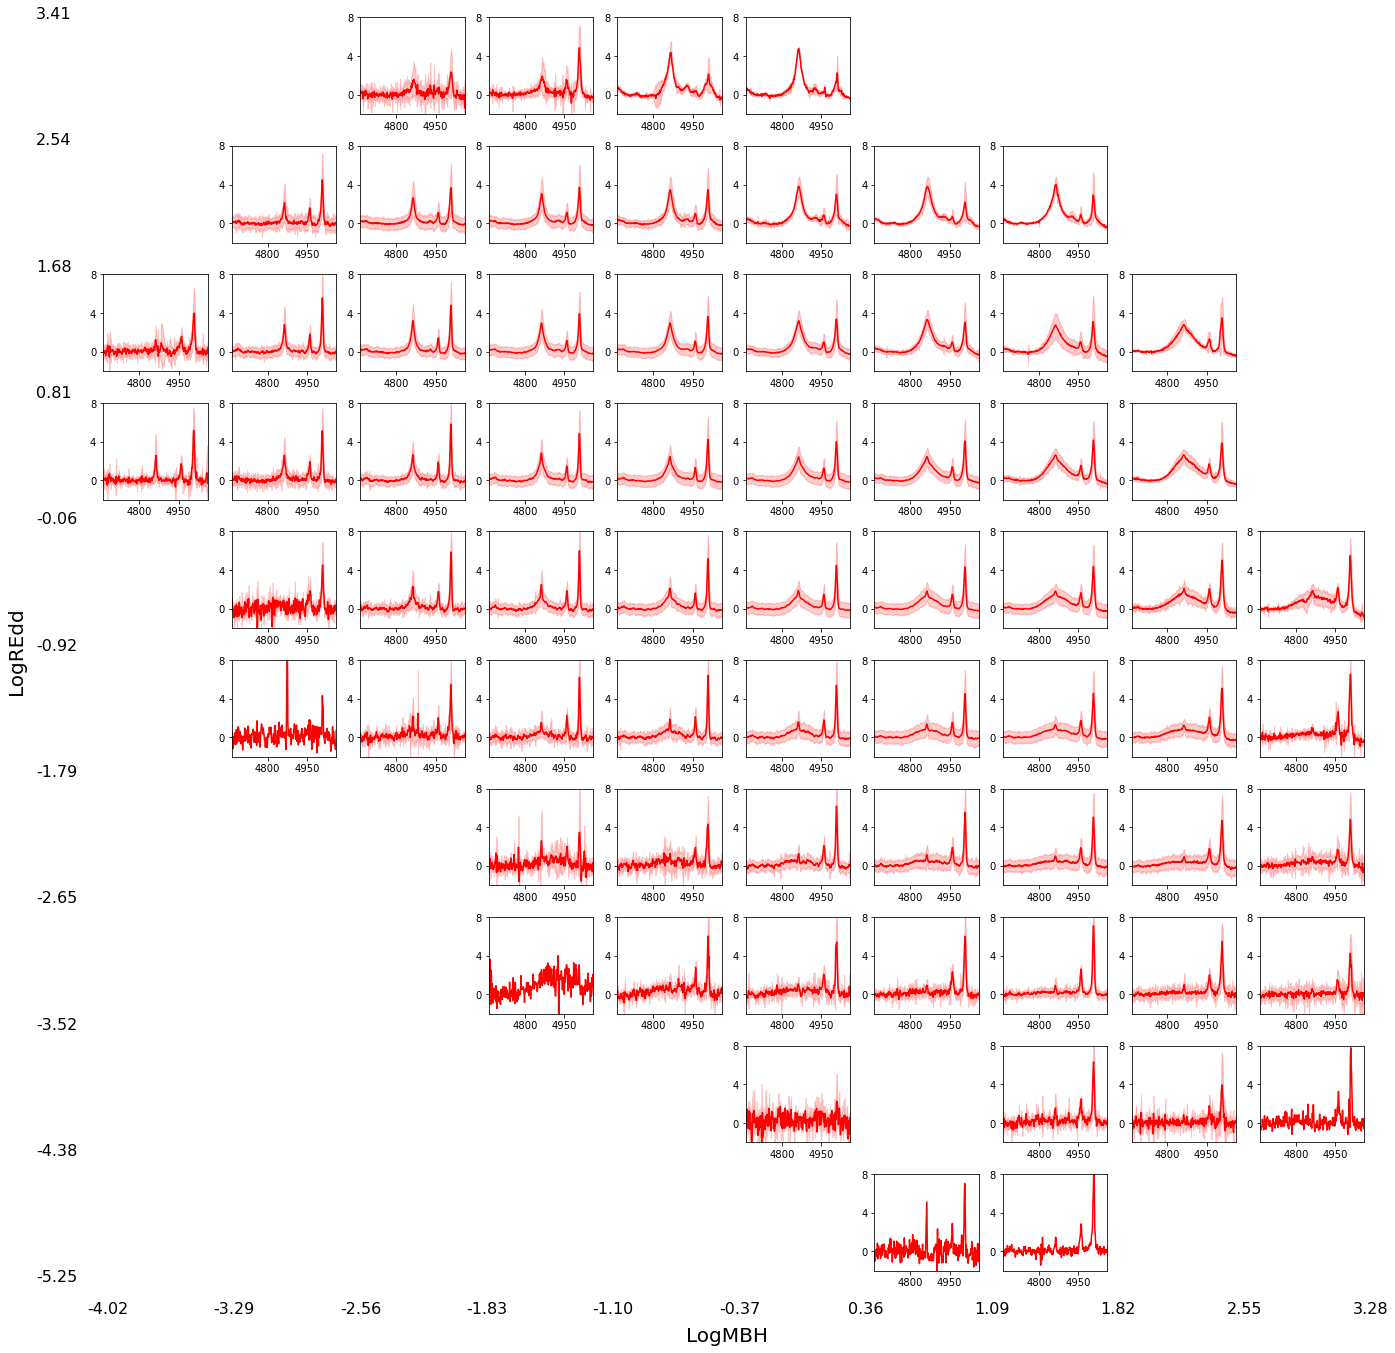

In [17]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings; warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Filter the dataset to include only rows where e_logMBH < 30
filtered_data = data[data['e_logMBH'] < 30]

# Assuming wavelength data columns are named like 'Flux_XXXX.X'
flux_columns = [col for col in filtered_data.columns if col.startswith('Flux_')]

# Define bin edges based on the range of logMBH and LogREdd
logMBH_bins = np.linspace(filtered_data['logMBH'].min(), filtered_data['logMBH'].max(), num=11)
LogREdd_bins = np.linspace(filtered_data['LogREdd'].min(), filtered_data['LogREdd'].max(), num=11)

# Create a 10x10 grid for subplots
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(10, 10, figure=fig)

# Bin the data
filtered_data['logMBH_bin'] = pd.cut(filtered_data['logMBH'], bins=logMBH_bins, labels=False, include_lowest=True)
filtered_data['LogREdd_bin'] = pd.cut(filtered_data['LogREdd'], bins=LogREdd_bins, labels=False, include_lowest=True)

# Group the data by bins
grouped = filtered_data.groupby(['logMBH_bin', 'LogREdd_bin'])

# Plot each group
for (logMBH_bin, LogREdd_bin), group in grouped:
    # Skip bins with no data points
    if group.empty:
        continue

    # Calculate the mean and standard deviation of flux for the group
    mean_flux = group[flux_columns].mean().values
    std_flux = group[flux_columns].std().values
    
    # Extract wavelengths from column names assuming they end with numbers indicating the wavelength
    wavelengths = [float(col.split('_')[-1]) for col in flux_columns]

    # Find the subplot location in the grid
    ax = fig.add_subplot(gs[9 - LogREdd_bin, logMBH_bin])  # Adjust for increasing LogREdd from bottom to top
    
    # Plot the mean flux against wavelength
    ax.plot(wavelengths, mean_flux, 'r-', label='Mean Flux')
    # Fill the area between mean + std and mean - std
    ax.fill_between(wavelengths, mean_flux - std_flux, mean_flux + std_flux, color='red', alpha=0.2)
    
    ax.set_ylim([-2, 8])

    # Optionally set the limits and ticks for better readability
    ax.set_xlim([wavelengths[0], wavelengths[-1]])
    ax.get_xaxis().set_major_locator(plt.MaxNLocator(3))
    ax.get_yaxis().set_major_locator(plt.MaxNLocator(3))
    
    # Only show x and y labels on the left and bottom plots
    if logMBH_bin != 0:
        ax.set_ylabel('')
    if LogREdd_bin != 0:
        ax.set_xlabel('')

# Add shared x and y axis labels
fig.text(0.5, 0.02, 'LogMBH', ha='center', fontsize=20)
fig.text(0, 0.5, 'LogREdd', va='center', rotation='vertical', fontsize=20)

# Add scaled logMBH and LogREdd labels along the outer edges
for i in range(11):
    fig.text(0.07 + 0.0877 * i, 0.04, f'{logMBH_bins[i]:.2f}', ha='center', fontsize=16)  # Bottom
    fig.text(0.02, 0.065 + 0.0877 * i, f'{LogREdd_bins[i]:.2f}', va='center', rotation='horizontal', fontsize=16)  # Left

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.savefig('latent_space.pdf',dpi=300)
plt.show()


/var/folders/ch/wn8vr5sd39z73l13gyfsrjkw0000gn/T/ipykernel_67989/1835339761.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['logMBH_bin'] = pd.cut(filtered_data['logMBH'], bins=logMBH_bins, include_lowest=True, labels=range(10))
/var/folders/ch/wn8vr5sd39z73l13gyfsrjkw0000gn/T/ipykernel_67989/1835339761.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['LogREdd_bin'] = pd.cut(filtered_data['LogREdd'], bins=LogREdd_bins, include_lowest=True, labels=range(10))


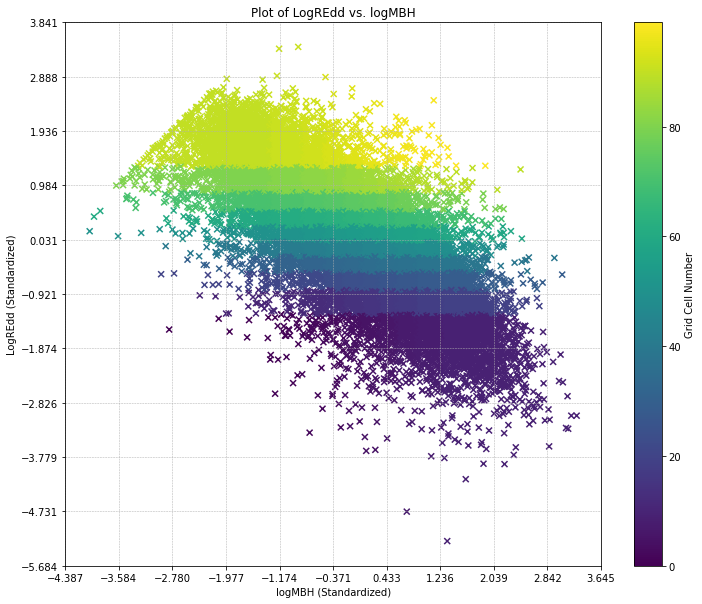

In [2]:
#Evenly distributed bins visulaisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Filter the dataset to include only rows where e_logMBH < 30
filtered_data = data[data['e_logMBH'] < 30]

# Define percentiles to cut the data into 10 bins for each dimension
percentiles = np.linspace(0, 100, 11)  # From 0% to 100% in 10% increments

# Compute the bin edges based on percentiles for logMBH and LogREdd
logMBH_bins = np.percentile(filtered_data['logMBH'], percentiles)
LogREdd_bins = np.percentile(filtered_data['LogREdd'], percentiles)

# Assign each data point to a bin
filtered_data['logMBH_bin'] = pd.cut(filtered_data['logMBH'], bins=logMBH_bins, include_lowest=True, labels=range(10))
filtered_data['LogREdd_bin'] = pd.cut(filtered_data['LogREdd'], bins=LogREdd_bins, include_lowest=True, labels=range(10))

# Creating the plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(filtered_data['logMBH'], filtered_data['LogREdd'], c=filtered_data['LogREdd_bin'].astype(int) * 10 + filtered_data['logMBH_bin'].astype(int), cmap='viridis', marker='x')
plt.colorbar(scatter, label='Grid Cell Number')
plt.xlabel('logMBH (Standardized)')
plt.ylabel('LogREdd (Standardized)')
plt.title('Plot of LogREdd vs. logMBH')
plt.grid(True)

# Add grid lines to visualize the 10x10 grid
plt.gca().xaxis.set_major_locator(ticker.LinearLocator(11))
plt.gca().yaxis.set_major_locator(ticker.LinearLocator(11))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


/Users/raunaqrai/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


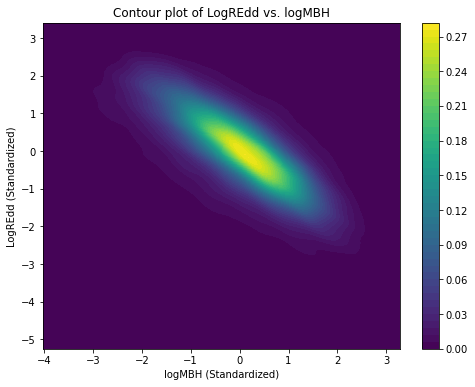

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Filter the dataset to include only rows where e_logMBH < 30
filtered_data = data[data['e_logMBH'] < 30]

# Extract the data for contour plotting
x = filtered_data['logMBH']
y = filtered_data['LogREdd']

# Calculate the point density
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Create a contour plot
fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, f, levels=50, cmap='viridis')
plt.colorbar(contour)
ax.set_xlabel('logMBH (Standardized)')
ax.set_ylabel('LogREdd (Standardized)')
ax.set_title('Contour plot of LogREdd vs. logMBH')
plt.show()


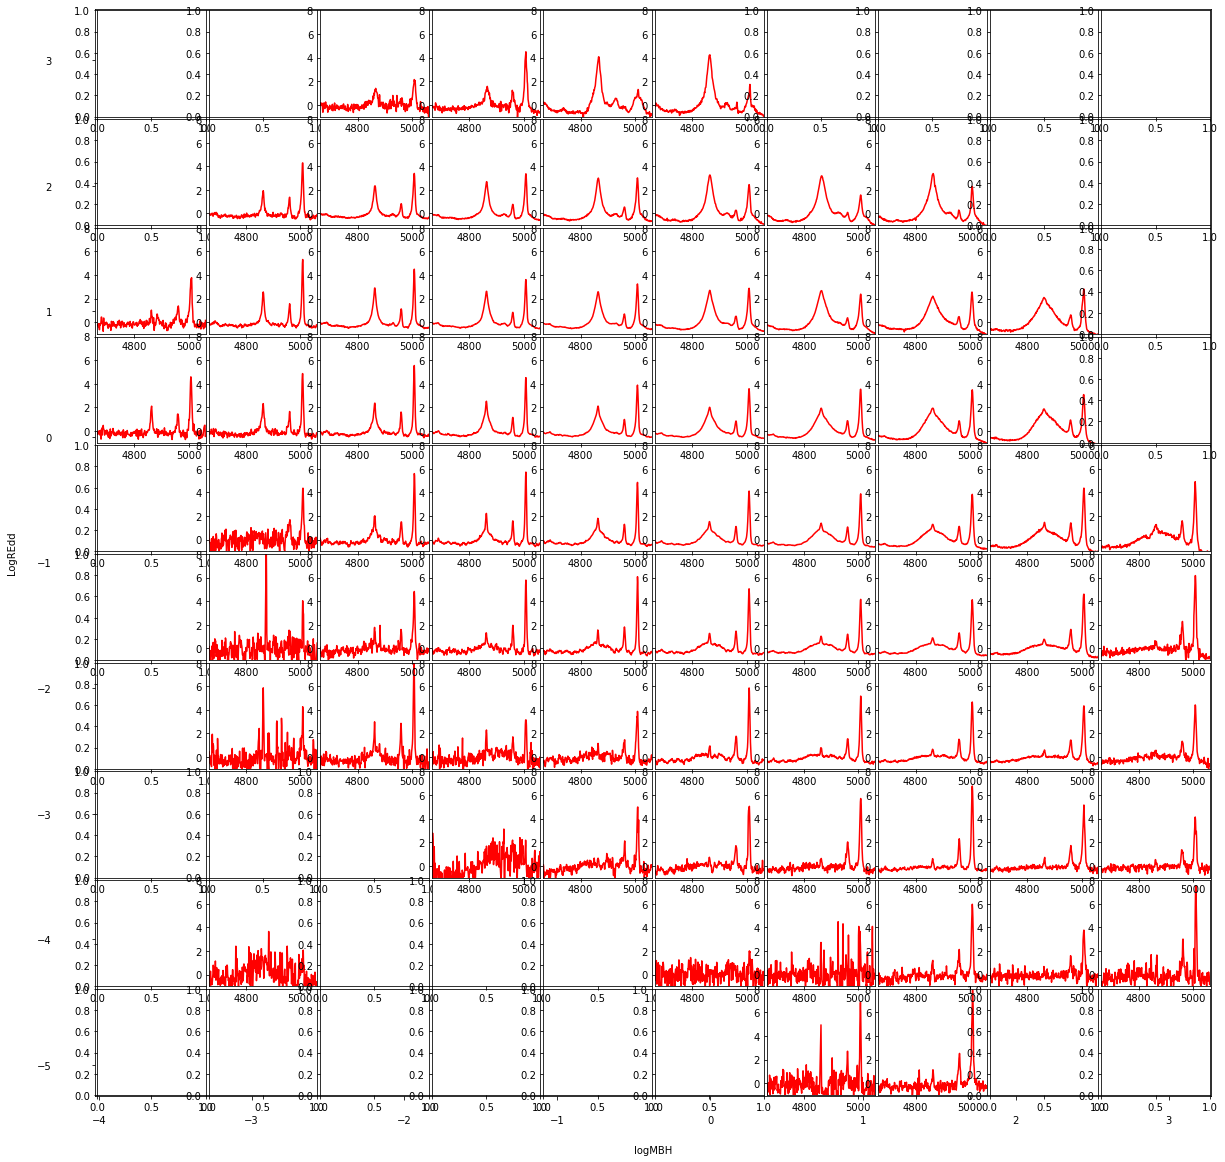

In [9]:
#latent space plot that divides the plot into 100 bins without taking into account the distribution of data points


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Assuming wavelength data columns are named like 'Flux_XXXX.X'
flux_columns = [col for col in data.columns if col.startswith('Flux_')]
wavelengths = [float(col.split('_')[-1]) for col in flux_columns]

# Define the 10x10 grid for binning
num_bins = 10
logMBH_range = np.linspace(data['logMBH'].min(), data['logMBH'].max(), num_bins + 1)
LogREdd_range = np.linspace(data['LogREdd'].min(), data['LogREdd'].max(), num_bins + 1)

# Prepare the figure and the main axes
fig, main_ax = plt.subplots(figsize=(20, 20))
main_ax.set_xlim(logMBH_range[0], logMBH_range[-1])
main_ax.set_ylim(LogREdd_range[0], LogREdd_range[-1])

# Set the axis labels
main_ax.set_xlabel('logMBH', labelpad=20)
main_ax.set_ylabel('LogREdd', labelpad=20)

# Adjust the pad for tick labels to move the numbers (tick labels) further away from the axes
main_ax.tick_params(axis='x', which='major', pad=15)  # Increase pad for x-axis tick labels
main_ax.tick_params(axis='y', which='major', pad=40)

# Adjust the space between subplots
space = 0.01  # Reduced space for fitting subplots nicely

# Loop through the bins and create an inset axes for each bin
for i in range(num_bins):
    for j in range(num_bins):
        # Calculate the positions for the inset axes
        left = logMBH_range[i] + space  # x position with space
        bottom = LogREdd_range[j] + space  # y position with space
        width = logMBH_range[i+1] - logMBH_range[i] - 2 * space  # width of the bin with space adjusted
        height = LogREdd_range[j+1] - LogREdd_range[j] - 2 * space  # height of the bin with space adjusted
        
        ax_inset = inset_axes(main_ax, width='100%', height='100%', 
                              bbox_to_anchor=(left, bottom, width, height),
                              bbox_transform=main_ax.transData, 
                              axes_class=plt.Axes, borderpad=0)
        
        # Filter the data for the current bin
        bin_data = data[(data['logMBH'] >= logMBH_range[i]) & (data['logMBH'] < logMBH_range[i+1]) &
                        (data['LogREdd'] >= LogREdd_range[j]) & (data['LogREdd'] < LogREdd_range[j+1])]
        if not bin_data.empty:
            mean_flux = bin_data[flux_columns].mean()
            # Plot mean flux vs. wavelength on the inset axes
            ax_inset.plot(wavelengths, mean_flux, 'r-')
            ax_inset.set_xlim(wavelengths[0], wavelengths[-1])
            ax_inset.set_ylim(-1, 8)  # Set fixed y-axis range for all subplots
            ax_inset.axis('on')
            
# Display the main plot with inset subplots
plt.show()


/var/folders/ch/wn8vr5sd39z73l13gyfsrjkw0000gn/T/ipykernel_53616/765088366.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['logMBH_bin'] = pd.cut(filtered_data['logMBH'], bins=logMBH_bins, labels=range(10), include_lowest=True)
/var/folders/ch/wn8vr5sd39z73l13gyfsrjkw0000gn/T/ipykernel_53616/765088366.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['LogREdd_bin'] = pd.cut(filtered_data['LogREdd'], bins=LogREdd_bins, labels=range(10), include_lowest=True)


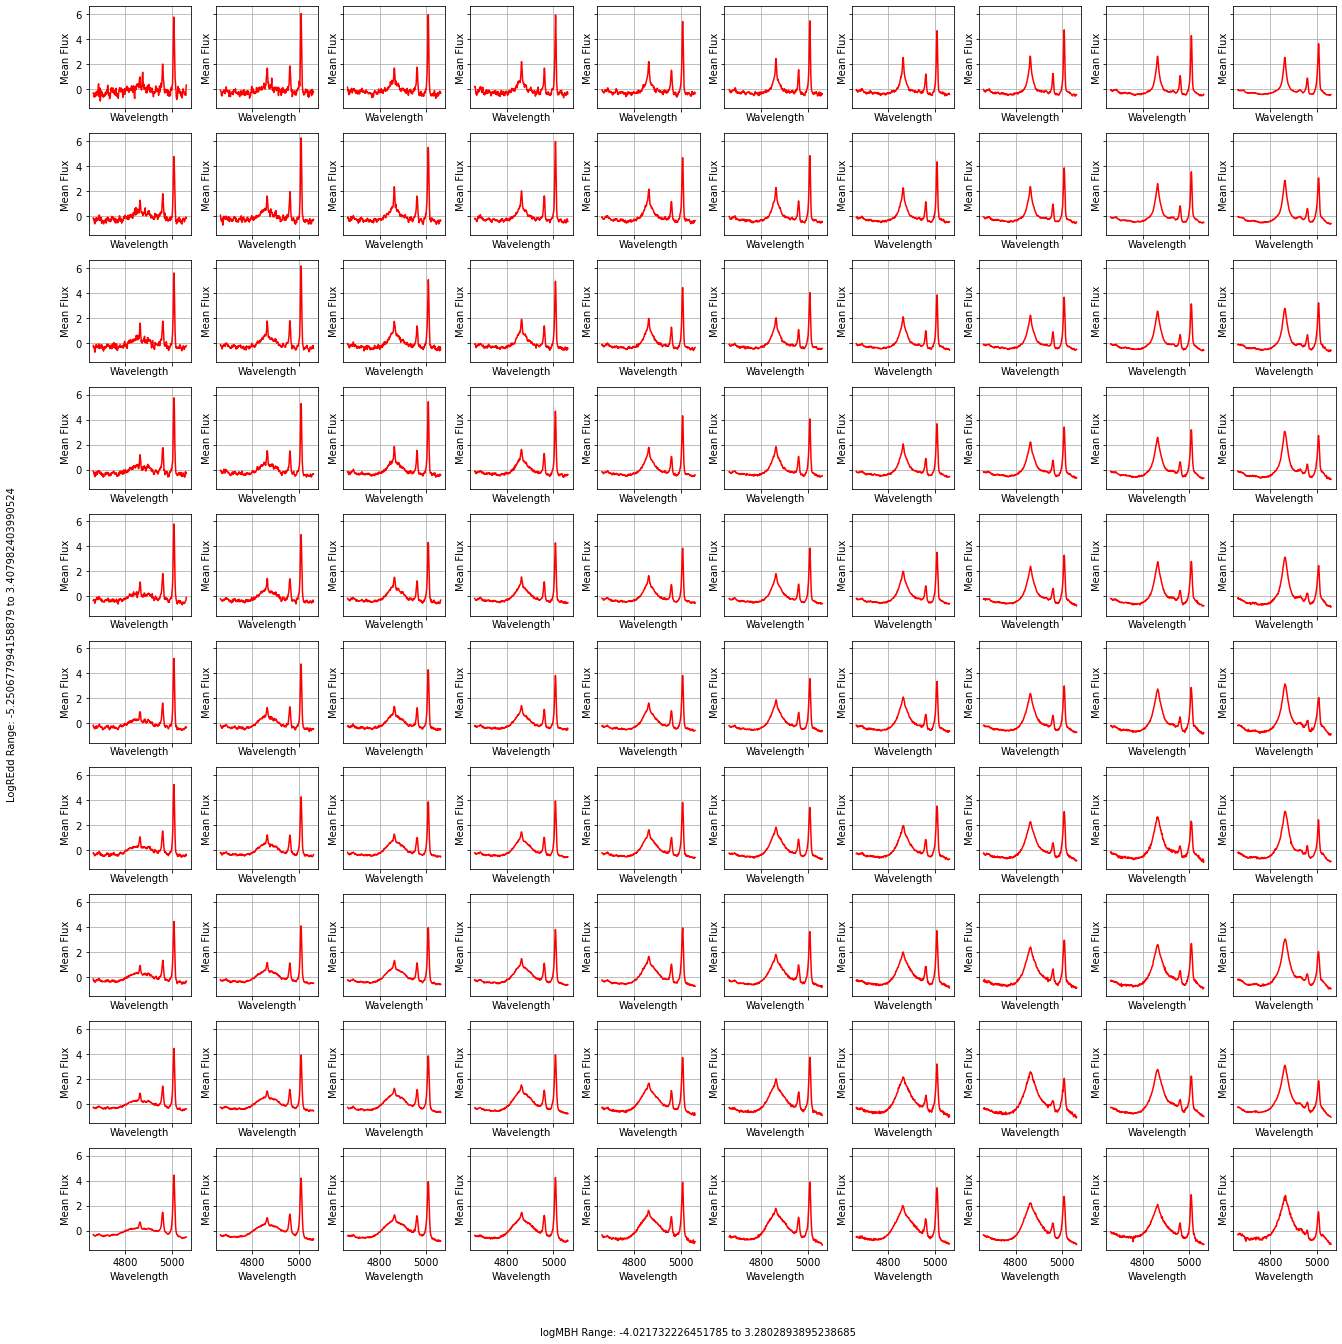

In [7]:
#latent space plot that takes into account the distribution of datapoints
#however the plot itsself is difficult to interpret - idk which bin each plot corresponds to

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('H-Beta-standardised_data.csv')

# Assuming wavelength data columns are named like 'Flux_XXXX.X'
flux_columns = [col for col in data.columns if col.startswith('Flux_')]
wavelengths = [float(col.split('_')[1]) for col in flux_columns]

# Filter the dataset for a specific e_logMBH condition
filtered_data = data[data['e_logMBH'] < 30]

# Define the percentile bins for logMBH and LogREdd
percentiles = np.linspace(0, 100, 11)  # 10 bins for each axis
logMBH_bins = np.percentile(filtered_data['logMBH'], percentiles)
LogREdd_bins = np.percentile(filtered_data['LogREdd'], percentiles)

# Bin data
filtered_data['logMBH_bin'] = pd.cut(filtered_data['logMBH'], bins=logMBH_bins, labels=range(10), include_lowest=True)
filtered_data['LogREdd_bin'] = pd.cut(filtered_data['LogREdd'], bins=LogREdd_bins, labels=range(10), include_lowest=True)

# Group by bins and calculate mean flux
grouped = filtered_data.groupby(['logMBH_bin', 'LogREdd_bin'])

# Setup a figure for subplots
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(20, 20), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for (logMBH_bin, LogREdd_bin), group in grouped:
    ax = axes[int(logMBH_bin), int(LogREdd_bin)]
    mean_flux = group[flux_columns].mean()
    ax.plot(wavelengths, mean_flux, 'r-')
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Mean Flux')
    ax.grid(True)

# Label the overall figure instead of each subplot
fig.text(0.5, 0.02, f'logMBH Range: {filtered_data["logMBH"].min()} to {filtered_data["logMBH"].max()}', ha='center')
fig.text(0.02, 0.5, f'LogREdd Range: {filtered_data["LogREdd"].min()} to {filtered_data["LogREdd"].max()}', va='center', rotation='vertical')

# Adjust layout to prevent overlap and ensure labels are visible
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
plt.show()
